# Step 0: Enable GPUs
First, you'll need to enable GPUs for the notebook:

*   Navigate to Edit→Notebook Settings
*   select GPU from the Hardware Accelerator drop-down

# Step 1: Installation
It takes about 30 minutes.

In [ ]:
!pip install torch torchvision torchaudio
!pip install tensorflow
!pip install "modelscope[cv]" -f https://modelscope.oss-cn-beijing.aliyuncs.com/releases/repo.html
!pip install git+https://github.com/NVlabs/nvdiffrast.git
!pip install -v -v -v  'git+https://github.com/facebookresearch/pytorch3d.git@stable'

In [ ]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

# Step 2: Model initialization
Initialize the pipeline and download the pretrained weights from modelscope.

In [ ]:
import os
import cv2
from moviepy.editor import ImageSequenceClip
from modelscope.models.cv.face_reconstruction.utils import write_obj
from modelscope.outputs import OutputKeys
from modelscope.pipelines import pipeline
from modelscope.utils.constant import Tasks

face_reconstruction = pipeline(Tasks.face_reconstruction, model='damo/cv_resnet50_face-reconstruction', model_revision='v2.0.0-HRN')

# Step 3: Run

In [15]:
def save_results(result, save_root):
    os.makedirs(save_root, exist_ok=True)

    # export obj and texture
    mesh = result[OutputKeys.OUTPUT]['mesh']
    texture_map = result[OutputKeys.OUTPUT_IMG]
    mesh['texture_map'] = texture_map
    write_obj(os.path.join(save_root, 'hrn_mesh_mid.obj'), mesh)

    # export rotation video
    frame_list = result[OutputKeys.OUTPUT]['frame_list']
    video = ImageSequenceClip(sequence=frame_list, fps=30)
    video.write_videofile(
        os.path.join(save_root, 'rotate.mp4'), fps=30, audio=False)
    del frame_list

    # save visualization image
    vis_image = result[OutputKeys.OUTPUT]['vis_image']
    cv2.imwrite(os.path.join(save_root, 'vis_image.jpg'), vis_image)

    print(f'Output written to {os.path.abspath(save_root)}')

result = face_reconstruction('./girl.jpg')
save_results(result, './face_reconstruction_results')

Moviepy - Building video ./face_reconstruction_results/rotate.mp4.
Moviepy - Writing video ./face_reconstruction_results/rotate.mp4



Moviepy - Done !
Moviepy - video ready ./face_reconstruction_results/rotate.mp4
Output written to /content/face_reconstruction_results


# Step 4: Visualize results

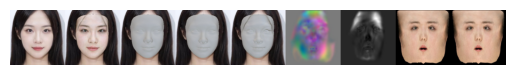

In [16]:
from matplotlib import pyplot as plt
def vis_img(path):
  img = cv2.imread(path,-1)
  plt.imshow(img[..., ::-1])
  plt.axis("off")
  plt.show()

vis_img('./face_reconstruction_results/vis_image.jpg')